In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
import pandas as pd
import numpy as np
import sklearn

In [23]:
data = pd.read_csv('test_data.csv', index_col='IDX')
data.DATES = pd.to_datetime(data.DATES, format='%Y-%m-%d')

In [45]:
data.shape

(50, 3)

In [47]:
data.describe()

,VOL,DURATION
count,50.000000,50.000000
mean,1182.800000,48.864000
std,241.143111,22.844466
min,900.000000,12.300000
25%,990.000000,30.125000
50%,1111.000000,49.600000
75%,1300.000000,61.620000
max,1800.000000,118.540000


In [24]:
data.head()

,DATES,VOL,DURATION
IDX,,,
1,2018-02-20,920,19.09
2,2018-02-21,1010,25.02
3,2018-02-22,966,26.50
4,2018-02-23,977,50.20
5,2018-02-24,905,13.99


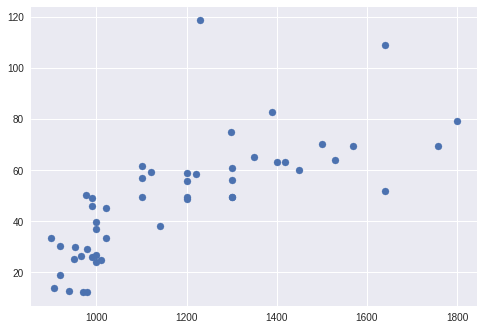

In [25]:
plt.scatter(data.VOL, data.DURATION)
plt.show()

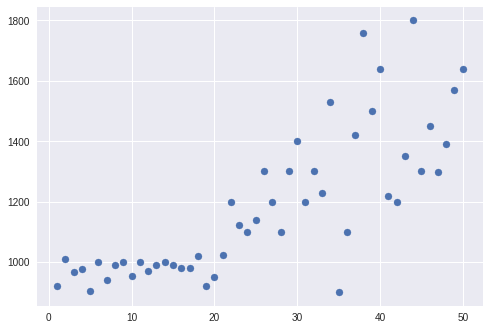

In [33]:
plt.scatter(data.index, data.VOL)
plt.show()

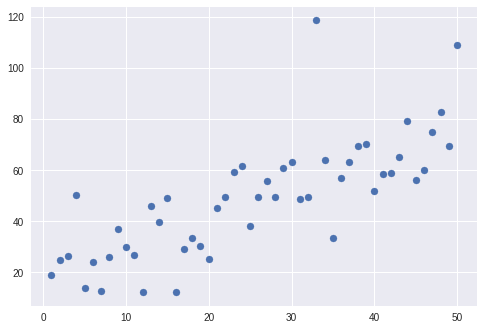

In [32]:
plt.scatter(data.index, data.DURATION)
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
X = data.drop(['DATES','DURATION'], axis = 1)

lm = LinearRegression()
lm.fit(X, data.DURATION)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
print ('Estimated incercept coefficient: ', lm.intercept_)

Estimated incercept coefficient:  -33.920945561619305


In [36]:
print ('Number of coefficients: ', len(lm.coef_))

Number of coefficients:  1


In [37]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoeff'])

TypeError: data argument can't be an iterator

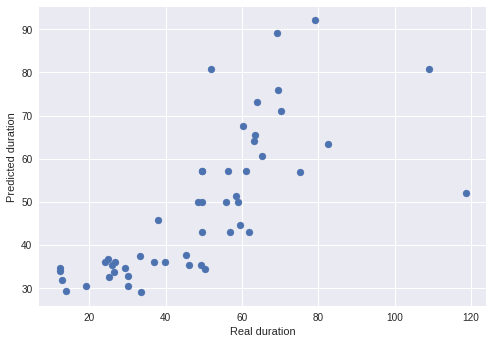

In [40]:
plt.scatter(data.DURATION, lm.predict(X))
plt.xlabel("Real duration")
plt.ylabel("Predicted duration");

In [41]:
mseFull = np.mean(data.DURATION - lm.predict(X) ** 2)
print(mseFull)

-2617.9882369776756


In [42]:
lm = LinearRegression()
lm.fit(X[['VOL']], data.DURATION)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
mseVOL = np.mean((data.DURATION - lm.predict(X[['VOL']])) ** 2)
print(mseVOL)

232.27051502232513
